<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/notebookes/StandardError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression on sample data
I sampled x and y from a population where y is roughly linear in x.
Let's graph the sample data.

Text(0.5, 1.0, 'Sample distribution')

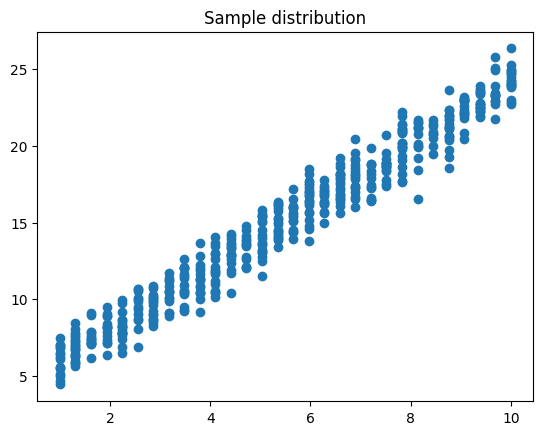

In [34]:
fix, axes = plt.subplots(ncols=1)
# sample[:,0], sample[:,1]
axes.scatter(x, y)
axes.set_title('Sample distribution')

Sample data looks pretty much we can pass a straight line ( a red one) through the data points. So we wanna run a linear regression model on this sample. We use an ols model to find the slope of that line.

In [35]:
import pandas as pd
import statsmodels.formula.api as sm
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
model = sm.ols('y ~ x', data=df).fit()
slope = model.params['x']
intercept = model.params['Intercept']

This model is learning the slope and intercept in below formula
$$
response = \beta_1 * predictor + \beta_0 + ϵ
$$
Lets plot the line with the data points now.

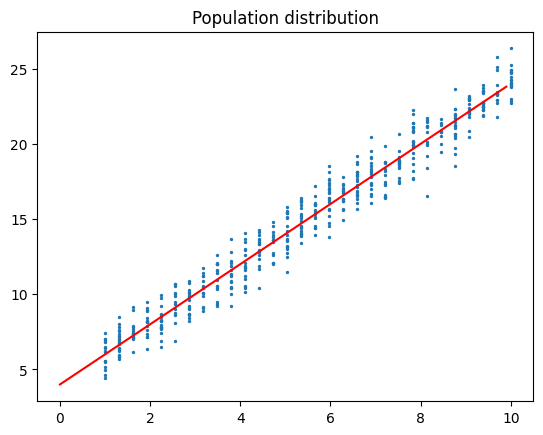

In [36]:
fix, axe = plt.subplots()

axe.scatter(x, y, s=2);
axe.set_title('Population distribution')
axe.plot(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1) * 2 + 4, color='r');


We all know something is going to look Gaussian distribution about the linear regression. But one might fail to see Gaussian here because all we can notice is a red line.
In fact difference between y value for blue data points  from red lines (ϵ) has a Gaussian distribution. We can plot it below


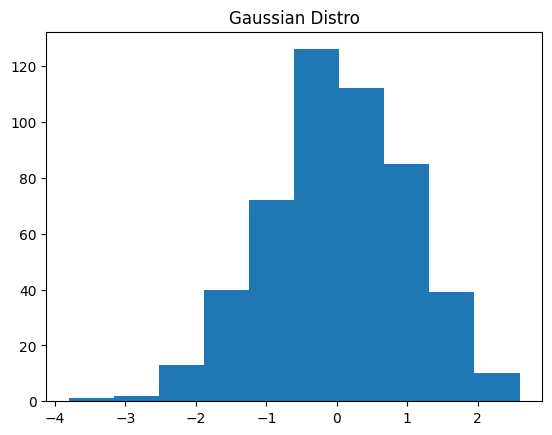

In [39]:
fix, axe = plt.subplots()

axe.set_title('Gaussian Distro (ϵ)')
axe.hist(y - (slope * x + intercept), bins=10);

## Model estimatation accuracy
We simply ran `model = sm.ols('y ~ x', data=df).fit()` on the sample to find slope and intercept. `model` variable stores the trained intercept and the slope. However, it does store some model stats. One of the stats we look at as a measure of accuracy of coefficient estimate is standard error of beta or SE(beta). SE(beta) standard deviation of its sampling distribution or an estimate of that standard deviation.

However it makes very little sene. And that is why I picked it for this write up . You can.
Firstly, how could the  model itself guess how accurate its estimation is? If it can tell how accurate it is, why doesnt it find a more accurate one?
Secondly, what is the sampling distribution?
I am gonna answer them all


## Population vs Sample
In  practical situations, the whole population is too big and mostly unknown to us. It is not possible to count every object in the population, so the regression is applied on a sample of the population.

Issue working with sample as a proxy of the population, is that we can not make direct assumption about the sample like we do for the population. For example how do we know the regression line is also a good estimation for the sample?

The answer is that we sample by replacement. Then we can use some math to calculate a bunch of expectations over the sample.

Let's generate a lot of random samples and calculate slope for all of them and plot the calculated slop 🤷


Text(0.5, 1.0, 'beta_1')

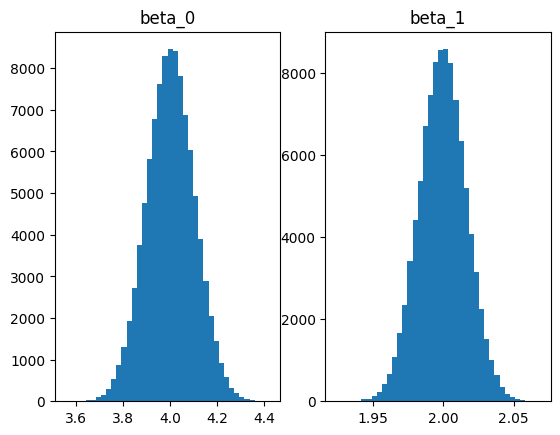

In [44]:
beta0s, beta1s = [], []
for i in range(100000):
  y_for_x_samples = np.array(list(sampler.sample_random_response()))
  # find regression parameters
  x = y_for_x_samples[:,0]
  y = y_for_x_samples[:,1]
  beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
  beta_0 = np.mean(y) - beta_1 * np.mean(x)

  beta0s.append(beta_0)
  beta1s.append(beta_1)

fix, axes = plt.subplots(ncols=2)
axes[0].hist(beta0s, bins=40);
axes[0].set_title('beta_0')
axes[1].hist(beta1s, bins=40);
axes[1].set_title('beta_1')
# print(model.bse['x'])



Notice that the values of betas over all samples has a Gaussian distribution as well. Now we can compute SE(beta1) from two different way. First approach is by definition, that is the standard deviation sampling distribution of beta_0. Secode approach is from the `model` that is `model.bse()`.


In [47]:
# prompt: calculate standard deviation of an array

std_beta0 = np.std(beta0s)
std_beta1 = np.std(beta1s)
print(f'SE(beta_0) = {std_beta0}')
print(f'SE(beta_1) = {std_beta1}')
print(f'SE(beta_1) = {model.bse["x"]}')

SE(beta_0) = 0.10231912255382845
SE(beta_1) = 0.01673601812043602
SE(beta_1) = 0.01684826247669203


## Conclusion
When we use the sample to calculate the standard error of model parameters, we calcuate the standard deviation of those parameter over sampling distribution of that parameters.
To compute it perfectly we need the population standard deviation. However, we can use the sample statndard deviation. So the SE(beta) is by itself an estmiation.

## Appendix

In [ ]:
import google.colab
repo_path = 'AminehTechnicalWritings'
!git -C $repo_path pull origin || git clone https://github.com/aminehd/AminehTechnicalWritings/ $repo_path
local_clone = '/content/' + repo_path
!git config --global user.email "amineh.dadsetan@gmail.com"
!git config --global user.name "Amineh Dadsetan"

In [5]:
%load_ext autoreload
%autoreload 2
# Import utility functions that provide answers to challenges
%load_ext autoreload


import sys
sys.path.insert(1, '/content/AminehTechnicalWritings/src')

# %aimport sampling_utils

import sampling_utils as su
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
population = su.get_population(local_clone + '/data/population.npz')
population.shape

(300000, 2)

In [33]:
sampler = su.PopulationSampler(population)
x_samp_index, x_samples = sampler.set_sample_xs(500)
resp = np.array(list(sampler.sample_random_response()))
x, y = resp[:, 0], resp[:, 1]

In [28]:
# prompt: find linear reg between x and y

import pandas as pd
import statsmodels.formula.api as sm

# Create a DataFrame for easier use with statsmodels
data = {'x': x, 'y': y}
df = pd.DataFrame(data)

# Fit the linear regression model
model = sm.ols('y ~ x', data=df).fit()

# Print the model summary
print(model.summary())

# Extract the coefficients
slope = model.params['x']
intercept = model.params['Intercept']

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 2.989e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:16:17   Log-Likelihood:                -1417.3
No. Observations:                1000   AIC:                             2839.
Df Residuals:                     998   BIC:                             2848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0438      0.070     57.618      0.0